# IMPORT STATEMENTS

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import networkx.algorithms.community as nx_comm

# DATA LOADING

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
control_w = pd.read_csv('/content/drive/MyDrive/Capstone/COMBINED DATA/UCLA Weighted v2/ucla_weighted_2001.csv', header=None)
control_b = pd.read_csv('/content/drive/MyDrive/Capstone/COMBINED DATA/UCLA Binary v2/ucla_binary_2001.csv', header=None)

schiz_w = pd.read_csv('/content/drive/MyDrive/Capstone/COMBINED DATA/UCLA Weighted v2/ucla_weighted_2050.csv', header=None)
schiz_b = pd.read_csv('/content/drive/MyDrive/Capstone/COMBINED DATA/UCLA Binary v2/ucla_binary_2050.csv', header=None)

In [ ]:
control_w = control_w.fillna(0)
control_w

0         1         2         3         4         5         6    \
0    0.000000  0.408635  0.091122  0.141027  0.212356  0.232217  0.153159   
1    0.408635  0.000000  0.437967  0.452820 -0.194418 -0.061455  0.120086   
2    0.091122  0.437967  0.000000  0.149192 -0.210396 -0.088659 -0.010411   
3    0.141027  0.452820  0.149192  0.000000 -0.279202 -0.365347  0.139110   
4    0.212356 -0.194418 -0.210396 -0.279202  0.000000  1.230418  0.292630   
..        ...       ...       ...       ...       ...       ...       ...   
159  0.127793 -0.119852 -0.055199 -0.405352  0.172673  0.302656  0.274365   
160 -0.009022  0.071226  0.002006 -0.256749 -0.104079 -0.031677  0.003387   
161  0.032929 -0.041300 -0.092069 -0.123936  0.324740  0.348344  0.075733   
162 -0.287735  0.020607  0.141708  0.341234  0.002076 -0.021810  0.041413   
163 -0.032206  0.334697  0.123455  0.212942  0.071211  0.139793  0.320208   

          7         8         9    ...       154       155       156  \
0    0.101704  0.422963  0.128853  ... -0.025669 -0.193461 -0.301842   
1   -0.040434  0.113105 -0.100684  ...  0.074928  0.391174 -0.152202   
2   -0.142276  0.162457  0.029971  ...  0.170891  0.203254 -0.453497   
3   -0.151724 -0.135375 -0.234444  ...  0.220136  0.406015 -0.007174   
4    0.114947 -0.027004  0.126552  ... -0.102763 -0.168673 -0.215468   
..        ...       ...       ...  ...       ...       ...       ...   
159  0.018730 -0.102738 -0.018337  ... -0.156202 -0.001783 -0.033378   
160  0.184985  0.197409  0.263079  ... -0.335995  0.103371 -0.014089   
161  0.165275  0.055391  0.082201  ...  0.182075 -0.152898 -0.162484   
162 -0.070582 -0.147424 -0.162111  ...  0.257025  0.331394  0.317331   
163 -0.259118 -0.214949 -0.308688  ...  0.082598  0.561398  0.120467   

          157       158       159       160       161       162       163  
0    0.016608  0.125022  0.127793 -0.009022  0.032929 -0.287735 -0.032206  
1    0.013005  0.098310 -0.119852  0.071226 -0.041300  0.020607  0.334697  
2   -0.228100 -0.106776 -0.055199  0.002006 -0.092069  0.141708  0.123455  
3    0.287492  0.414779 -0.405352 -0.256749 -0.123936  0.341234  0.212942  
4   -0.067362  0.078732  0.172673 -0.104079  0.324740  0.002076  0.071211  
..        ...       ...       ...       ...       ...       ...       ...  
159 -0.069242  0.186240  0.000000  0.464738  0.004600 -0.256581  0.123504  
160 -0.013803  0.036471  0.464738  0.000000  0.074358 -0.234034 -0.081693  
161 -0.045002  0.188467  0.004600  0.074358  0.000000  0.174516  0.224962  
162  0.250406  0.217712 -0.256581 -0.234034  0.174516  0.000000  0.572156  
163 -0.016516  0.305106  0.123504 -0.081693  0.224962  0.572156  0.000000  

[164 rows x 164 columns]

In [ ]:
control_b = control_b.fillna(0)
control_b

0    1    2    3    4    5    6    7    8    9    ...  154  155  156  \
0      0    1    0    0    1    1    1    0    1    0  ...    0    0    0   
1      1    0    1    1    0    0    0    0    0    0  ...    0    1    0   
2      0    1    0    0    0    0    0    0    1    0  ...    1    1    0   
3      0    1    0    0    0    0    0    0    0    0  ...    1    1    0   
4      1    0    0    0    0    1    1    0    0    0  ...    0    0    0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
159    0    0    0    0    1    1    1    0    0    0  ...    0    0    0   
160    0    0    0    0    0    0    0    1    1    1  ...    0    0    0   
161    0    0    0    0    1    1    0    1    0    0  ...    1    0    0   
162    0    0    0    1    0    0    0    0    0    0  ...    1    1    1   
163    0    1    0    1    0    0    1    0    0    0  ...    0    1    0   

     157  158  159  160  161  162  163  
0      0    0    0    0    0    0    0  
1      0    0    0    0    0    0    1  
2      0    0    0    0    0    0    0  
3      1    1    0    0    0    1    1  
4      0    0    1    0    1    0    0  
..   ...  ...  ...  ...  ...  ...  ...  
159    0    1    0    1    0    0    0  
160    0    0    1    0    0    0    0  
161    0    1    0    0    0    1    1  
162    1    1    0    0    1    0    1  
163    0    1    0    0    1    1    0  

[164 rows x 164 columns]

In [ ]:
schiz_w = schiz_w.fillna(0)
schiz_w

0         1         2         3         4         5         6    \
0    0.000000 -0.199864  0.306691  0.427212 -0.377667 -0.298724 -0.043811   
1   -0.199864  0.000000  0.206702  0.283586 -0.019990  0.019396  0.247998   
2    0.306691  0.206702  0.000000  0.534628 -0.420551 -0.399066 -0.297049   
3    0.427212  0.283586  0.534628  0.000000 -0.400042 -0.675617  0.008363   
4   -0.377667 -0.019990 -0.420551 -0.400042  0.000000  0.900490  0.297122   
..        ...       ...       ...       ...       ...       ...       ...   
159  0.028859 -0.310214 -0.199496 -0.189668  0.007315  0.016735 -0.191716   
160 -0.265380 -0.277037 -0.370611 -0.442891  0.090870  0.115658 -0.139092   
161 -0.202769 -0.167188 -0.552946 -0.372531  0.167164  0.186779 -0.238690   
162 -0.354056  0.194978 -0.335422 -0.436120  0.366381  0.437522  0.050426   
163 -0.442704  0.079725 -0.196819 -0.270177  0.166167  0.382487 -0.287473   

          7         8         9    ...       154       155       156  \
0   -0.082464 -0.154903  0.172006  ... -0.257223 -0.463349  0.153641   
1   -0.200975 -0.439856 -0.154268  ...  0.137980  0.190661 -0.364136   
2   -0.254833 -0.411396 -0.221787  ... -0.071496 -0.099853  0.118220   
3    0.021390 -0.276288  0.280531  ... -0.224490 -0.181038 -0.074315   
4    0.319859  0.450685  0.115984  ... -0.159291  0.036698 -0.094232   
..        ...       ...       ...  ...       ...       ...       ...   
159  0.323057  0.272342  0.118058  ...  0.414177 -0.138452  0.614666   
160  0.402877  0.204267  0.037385  ...  0.341713  0.045488  0.164107   
161  0.480555  0.248219  0.220098  ...  0.375301  0.180514  0.267972   
162  0.218706  0.043078 -0.101902  ...  0.301441 -0.016513 -0.038526   
163  0.153718 -0.029375 -0.176732  ...  0.237672  0.222575  0.212399   

          157       158       159       160       161       162       163  
0    0.085427  0.005707  0.028859 -0.265380 -0.202769 -0.354056 -0.442704  
1   -0.324432 -0.071845 -0.310214 -0.277037 -0.167188  0.194978  0.079725  
2    0.120421 -0.053479 -0.199496 -0.370611 -0.552946 -0.335422 -0.196819  
3   -0.085636 -0.072086 -0.189668 -0.442891 -0.372531 -0.436120 -0.270177  
4    0.055560 -0.029214  0.007315  0.090870  0.167164  0.366381  0.166167  
..        ...       ...       ...       ...       ...       ...       ...  
159  0.132951  0.865485  0.000000  0.653030  0.658486  0.172653  0.075298  
160  0.127256  0.356703  0.653030  0.000000  0.830787  0.236354  0.294900  
161 -0.051217  0.486861  0.658486  0.830787  0.000000  0.490575  0.450453  
162 -0.171581  0.157151  0.172653  0.236354  0.490575  0.000000  0.650713  
163 -0.206841  0.023125  0.075298  0.294900  0.450453  0.650713  0.000000  

[164 rows x 164 columns]

In [ ]:
schiz_b = schiz_b.fillna(0)
schiz_b

0    1    2    3    4    5    6    7    8    9    ...  154  155  156  \
0      0    0    1    1    0    0    0    0    0    1  ...    0    0    1   
1      0    0    1    1    0    0    1    0    0    0  ...    0    1    0   
2      1    1    0    1    0    0    0    0    0    0  ...    0    0    0   
3      1    1    1    0    0    0    0    0    0    1  ...    0    0    0   
4      0    0    0    0    0    1    1    1    1    0  ...    0    0    0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
159    0    0    0    0    0    0    0    1    1    0  ...    1    0    1   
160    0    0    0    0    0    0    0    1    1    0  ...    1    0    1   
161    0    0    0    0    1    1    0    1    1    1  ...    1    1    1   
162    0    1    0    0    1    1    0    1    0    0  ...    1    0    0   
163    0    0    0    0    1    1    0    1    0    0  ...    1    1    1   

     157  158  159  160  161  162  163  
0      0    0    0    0    0    0    0  
1      0    0    0    0    0    1    0  
2      0    0    0    0    0    0    0  
3      0    0    0    0    0    0    0  
4      0    0    0    0    1    1    1  
..   ...  ...  ...  ...  ...  ...  ...  
159    0    1    0    1    1    1    0  
160    0    1    1    0    1    1    1  
161    0    1    1    1    0    1    1  
162    0    1    1    1    1    0    1  
163    0    0    0    1    1    1    0  

[164 rows x 164 columns]

# CONVERT TO GRAPH

## Control

In [ ]:
Gc = nx.from_pandas_adjacency(control_w)
Gcb = nx.from_pandas_adjacency(control_b)

In [ ]:
print("Number of nodes in the graph:", len(Gc.nodes()))
print("Nodes:", Gcb.nodes())
print()
print("Number of edges in the graph:", len(Gc.edges()))
print("Edges:", Gcb.edges(data=True))

Number of nodes in the graph: 164
Nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163]

Number of edges in the graph: 13366
Edges: [(0, 1, {'weight': 1}), (0, 4, {'weight': 1}), (0, 5, {'weight': 1}), (0, 6, {'weight': 1}), (0, 8, {'weight': 1}), (0, 11, {'weight': 1}), (0, 13, {'weight': 1}), (0, 30, {'weight': 1}), (0, 32, {'weight

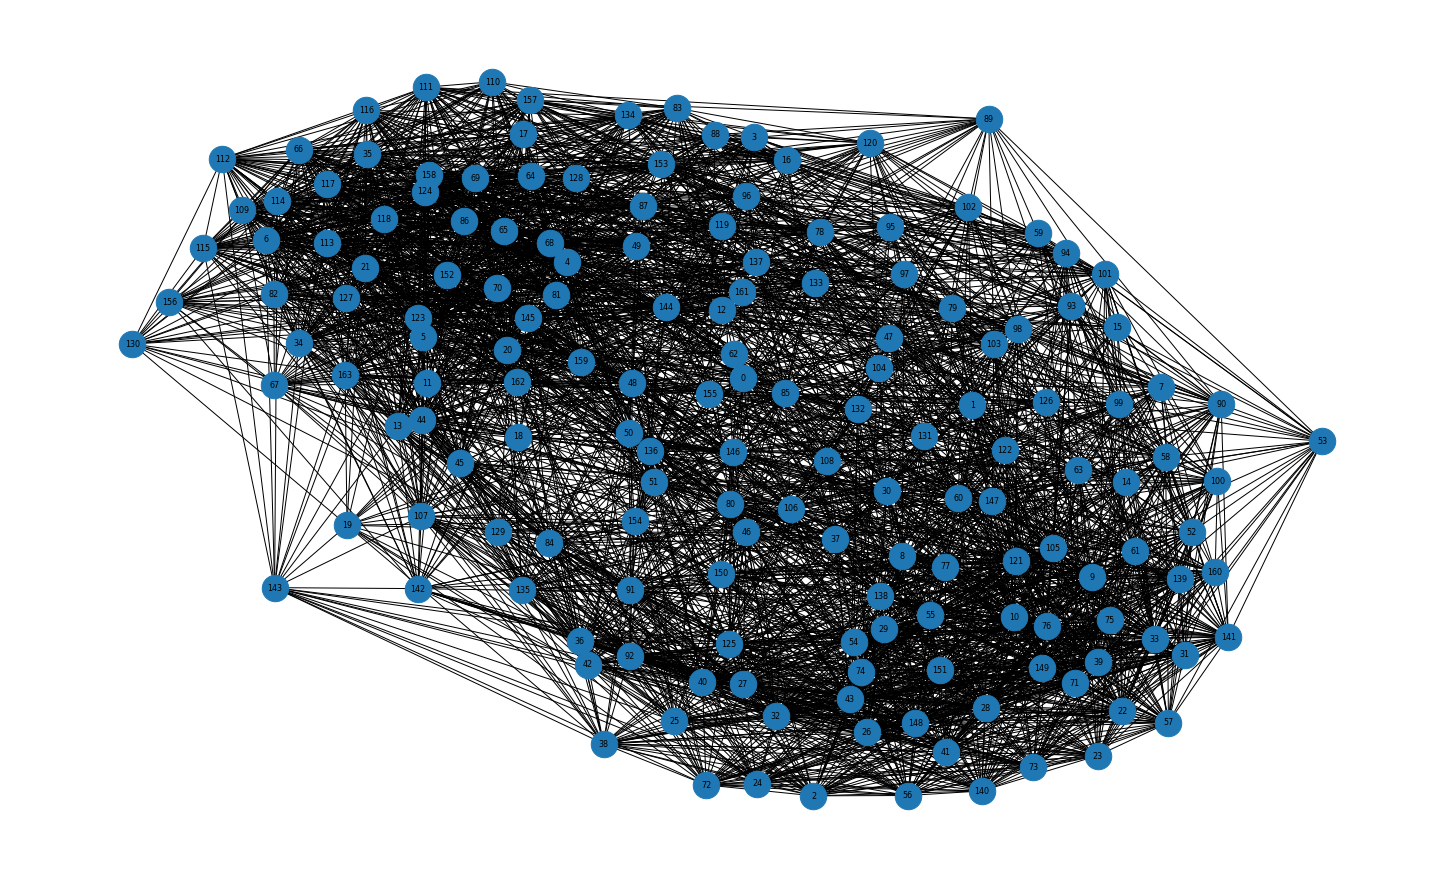

In [ ]:
#control
plt.figure(3,figsize=(20,12)) 
nx.draw(Gcb, with_labels=True, node_size=700, font_size=8)
plt.show()

In [ ]:
from networkx.algorithms.community.centrality import girvan_newman
communities_generator = girvan_newman(Gcb)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
next_next_level_communities = next(communities_generator)
map(sorted, next_next_level_communities)

for i in next_next_level_communities:
  print(i)
print('Number of communities is', len(next_next_level_communities))

{0, 1, 2, 7, 8, 9, 10, 14, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 36, 37, 38, 39, 40, 41, 42, 43, 46, 47, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 63, 71, 72, 73, 74, 75, 76, 77, 79, 80, 84, 85, 90, 91, 92, 93, 94, 97, 98, 99, 100, 103, 104, 105, 106, 108, 121, 122, 125, 126, 129, 131, 132, 135, 136, 138, 139, 140, 141, 146, 147, 148, 149, 150, 151, 154, 160}
{128, 130, 3, 4, 5, 134, 6, 133, 137, 11, 12, 13, 142, 143, 16, 145, 144, 19, 17, 18, 20, 21, 152, 153, 155, 156, 157, 158, 159, 161, 34, 35, 162, 163, 44, 45, 48, 49, 50, 59, 64, 65, 66, 67, 68, 69, 70, 78, 81, 82, 83, 86, 87, 88, 89, 95, 96, 101, 102, 107, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 123, 124, 127}
{15}
{62}
Number of communities is 4


## Schiz

In [ ]:
Gs = nx.from_pandas_adjacency(schiz_w)
Gsb = nx.from_pandas_adjacency(schiz_b)

In [ ]:
print("Number of nodes in the graph:", len(Gs.nodes()))
print("Nodes:", Gs.nodes())
print()
print("Number of edges in the graph:", len(Gs.edges()))
print("Edges:", Gs.edges(data=True))

Number of nodes in the graph: 164
Nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163]

Number of edges in the graph: 13366
Edges: [(0, 1, {'weight': -0.199863960543291}), (0, 2, {'weight': 0.30669061740636}), (0, 3, {'weight': 0.427211865961243}), (0, 4, {'weight': -0.377667247667822}), (0, 5, {'weight': -0.298723562998874}), (0, 6,

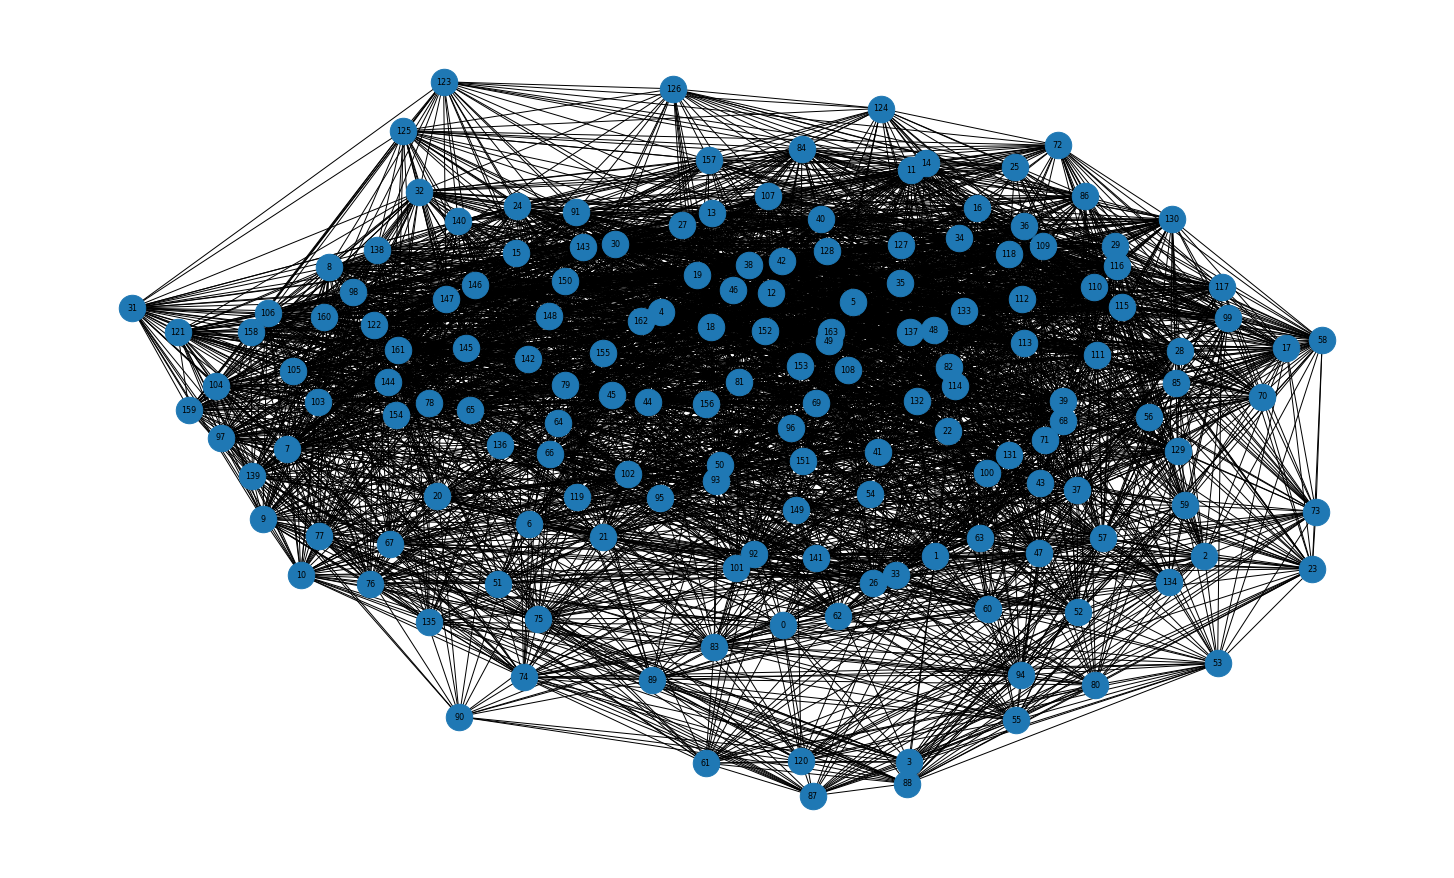

In [ ]:
plt.figure(3,figsize=(20,12)) 
nx.draw(Gsb, with_labels=True, node_size=700, font_size=8)
plt.show()

In [ ]:
from networkx.algorithms.community.centrality import girvan_newman
communities_generator = girvan_newman(Gsb)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
next_next_level_communities = next(communities_generator)
map(sorted, next_next_level_communities)

for i in next_next_level_communities:
  print(i)
print('Number of communities is', len(next_next_level_communities))

{0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 89, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163}
{3}
{88}
{90}
Number of communities is 4


# PRELIMINARY ANALYSIS

In [ ]:
deg_s = list(Gsb.degree(schiz_b))
deg_s = sorted(deg_s, key= lambda s: s[1])

deg_c = list(Gcb.degree(control_b))
deg_c = sorted(deg_c, key= lambda s: s[1])

print("Max degrees:\nSchiz:",deg_s[-1][1],' for nodes',[i[0] for i in deg_s if i[1]==deg_s[-1][1]],'\nControl:',deg_c[-1][1],' for node',[i[0] for i in deg_c if i[1]==deg_c[-1][1]])
print()
print("Min degrees:\nSchiz:",deg_s[0][1], ' for nodes',[i[0] for i in deg_s if i[1]==deg_s[0][1]], '\nControl:',deg_c[0][1], ' for node',[i[0] for i in deg_c if i[1]==deg_c[0][1]])

Max degrees:
Schiz: 83  for nodes [42] 
Control: 69  for node [146]

Min degrees:
Schiz: 18  for nodes [90] 
Control: 18  for node [15, 62]


## Degree

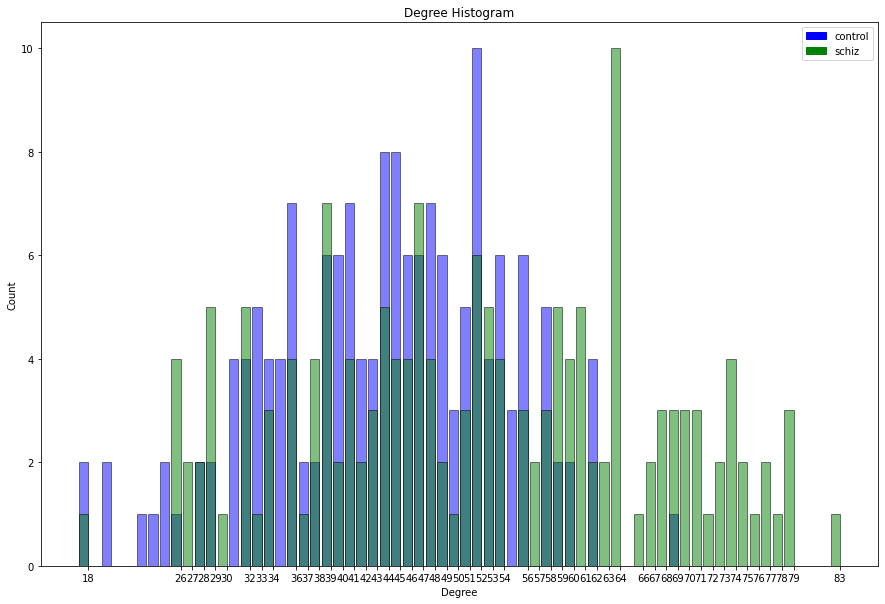

In [ ]:
import collections

degree_sequence = sorted([d for n, d in Gcb.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=(15, 10))
plt.bar(deg, cnt, width=0.80, color='b', alpha=0.5, edgecolor='black')

degree_sequence = sorted([d for n, d in Gsb.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
plt.bar(deg, cnt, width=0.80, color='g', alpha=0.5, edgecolor='black')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.legend(loc='upper right')
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

colors = {'control':'blue', 'schiz':'green'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

# draw graph in inset
# plt.axes([0.4, 0.4, 0.5, 0.5])
# A = (Gcb.subgraph(c) for c in nx.connected_components(Gcb))
# Gcc = sorted(A, key=len, reverse=True)[0]
# pos = nx.spring_layout(Gcb)
# plt.axis('off')
#nx.draw_networkx_nodes(Gcb, pos, node_size=20)
#nx.draw_networkx_edges(Gcb, pos, alpha=0.4)

plt.show()

**CONTROL**

(9, 70)

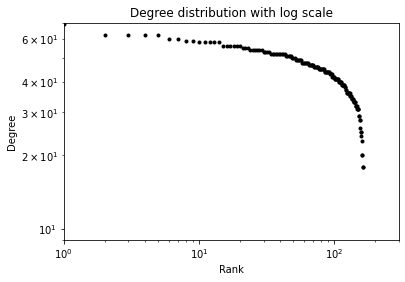

In [ ]:
degrees = Gcb.degree()
degree_sequence = sorted([d for n, d in Gcb.degree()], reverse=True)
plt.loglog(range(1,Gcb.order()+1),degree_sequence,'k.')
plt.title("Degree distribution with log scale")
plt.xlabel('Rank')
plt.ylabel('Degree')
plt.xlim(1,300)
plt.ylim(9,max(degree_sequence)+1)

**SCHIZ**

(9, 84)

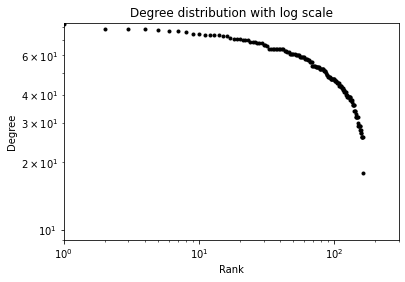

In [ ]:
degrees = Gsb.degree()
degree_sequence = sorted([d for n, d in Gsb.degree()], reverse=True)
plt.loglog(range(1,Gsb.order()+1),degree_sequence,'k.')
plt.title("Degree distribution with log scale")
plt.xlabel('Rank')
plt.ylabel('Degree')
plt.xlim(1,300)
plt.ylim(9,max(degree_sequence)+1)

## Community detection

## Graph communities

In [ ]:
from networkx.algorithms import community

Kernighan lin: A greedy approach that bisects the graph such that no. of vertices are equitably distributed and the number of edge cuts are minimal

**CONTROL**

In [ ]:
c = community.kernighan_lin_bisection(Gcb)

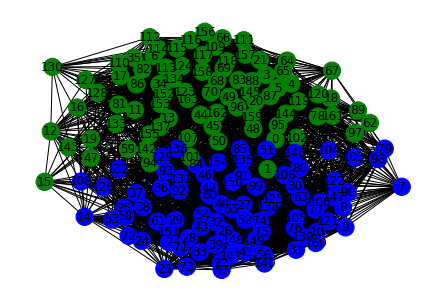

In [ ]:
#plt.figure(figsize=(15,8))
color_map = []
for node in Gcb:
    if node in c[0]:
        color_map.append('blue')
    else: 
        color_map.append('green')      
nx.draw(Gcb, node_color=color_map, with_labels=True)
plt.show()

**SCHIZ**

In [ ]:
c = community.kernighan_lin_bisection(Gsb)

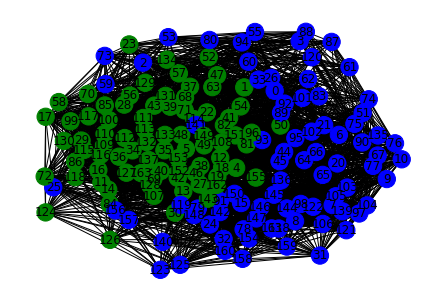

In [ ]:
#plt.figure(figsize=(15,8))
color_map = []
for node in Gsb:
    if node in c[0]:
        color_map.append('blue')
    else: 
        color_map.append('green')      
nx.draw(Gsb, node_color=color_map, with_labels=True)
plt.show()

## K Clique community detection

A k-clique community is the union of all cliques of size k that can be reached through adjacent (sharing k-1 nodes) k-cliques.

**CONTROL**

In [ ]:
c = community.k_clique_communities(Gcb, 23)
print(list(c))

[]


**SCHIZ**

In [ ]:
c = community.k_clique_communities(Gsb, 23)
print(list(c))

[frozenset({130, 4, 5, 137, 12, 13, 18, 19, 152, 153, 30, 34, 35, 162, 163, 42, 48, 49, 96, 107, 108, 109, 110, 112, 113, 114, 115, 116}), frozenset({4, 5, 137, 12, 13, 18, 19, 153, 30, 34, 35, 162, 38, 40, 42, 46, 48, 49, 96, 107, 108, 109, 110, 112, 113, 114, 115, 116})]


23 WAS CHOSEN BECAUSE IT WAS THE HIGHEST NUMBER WHICH YIELDED A COMMUNITY

**CONTROL**

In [ ]:
c = community.k_clique_communities(Gcb, 19)
x = list(c)
print(len(x), x)

3 [frozenset({2, 71, 73, 10, 76, 148, 149, 22, 26, 28, 29, 32, 33, 39, 41, 43, 54, 55, 57}), frozenset({10, 140, 148, 149, 22, 26, 28, 31, 32, 33, 41, 43, 55, 57, 71, 74, 76, 77, 105, 121}), frozenset({10, 140, 148, 26, 27, 28, 31, 32, 40, 41, 43, 55, 56, 57, 71, 74, 76, 77, 105, 121})]


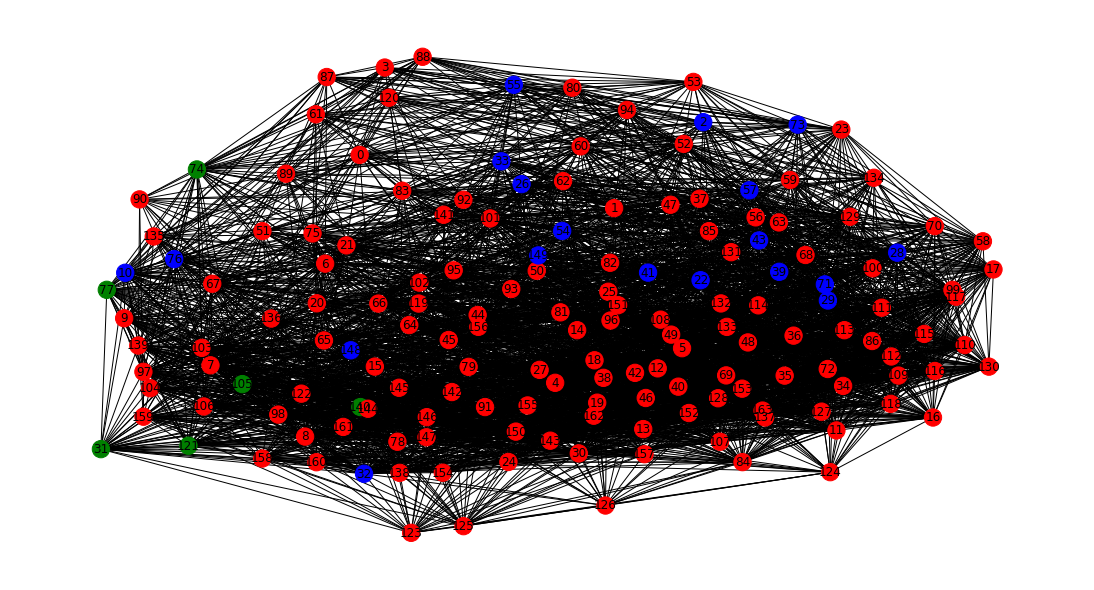

In [ ]:
plt.figure(figsize=(15,8))
color_map = []
for node in Gcb:
    if node in x[0]:
        color_map.append('blue')
    elif node in x[1]: 
        color_map.append('green')  
    else:
        color_map.append('red')    
nx.draw(Gsb, node_color=color_map, with_labels=True)
plt.show()

In [ ]:
c = community.k_clique_communities(Gsb, 19)
x = list(c)
print(len(x), x)

5 [frozenset({6, 7, 8, 9, 10, 20, 45, 64, 65, 66, 67, 76, 97, 98, 103, 104, 105, 106, 121, 122}), frozenset({7, 8, 9, 138, 139, 144, 145, 146, 147, 31, 32, 161, 65, 97, 98, 103, 104, 105, 106, 121, 122}), frozenset({128, 130, 4, 5, 133, 137, 11, 12, 13, 143, 16, 18, 19, 146, 150, 22, 152, 153, 151, 28, 30, 34, 35, 162, 163, 36, 38, 40, 41, 42, 39, 46, 48, 49, 68, 71, 84, 96, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 127}), frozenset({4, 5, 12, 13, 18, 19, 27, 34, 35, 36, 38, 40, 41, 42, 44, 45, 48, 49, 81, 107, 108}), frozenset({4, 5, 12, 13, 18, 19, 27, 38, 40, 41, 42, 44, 45, 48, 49, 64, 65, 66, 81, 108})]


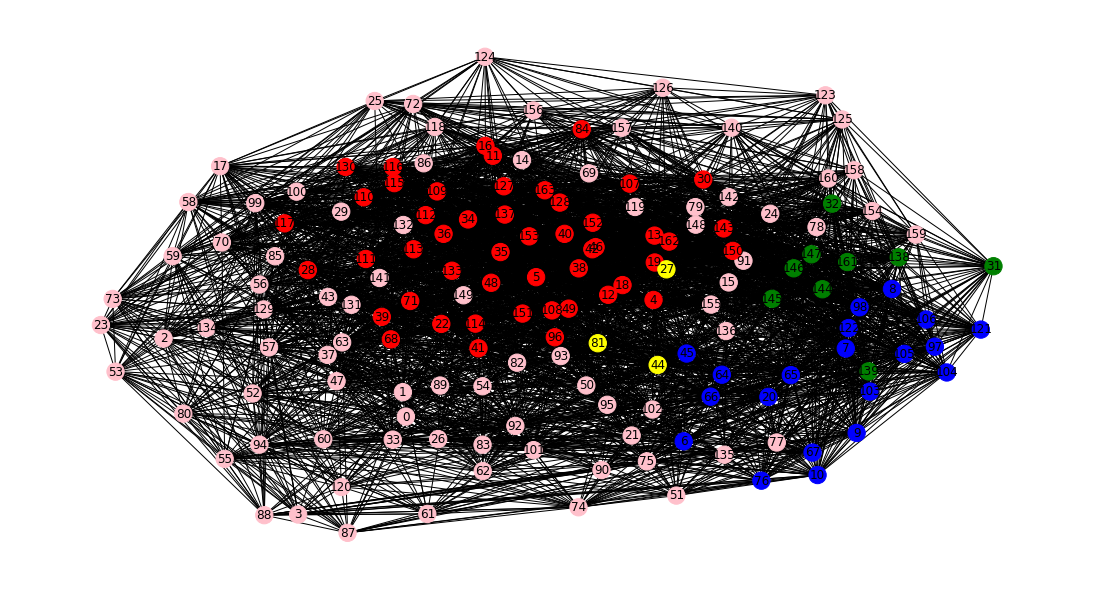

In [ ]:
plt.figure(figsize=(15,8))
color_map = []
for node in Gcb:
    if node in x[0]:
        color_map.append('blue')
    elif node in x[1]: 
        color_map.append('green')  
    elif node in x[2]:
        color_map.append('red') 
    elif node in x[3]:
        color_map.append('yellow')
    else:
        color_map.append('pink')
nx.draw(Gsb, node_color=color_map, with_labels=True)
plt.show()

## Graph colouring

**CONTROL**

In [ ]:
col = ["lightcoral", "gray", "lightgray", "firebrick", "red", "chocolate", "darkorange", "moccasin", "gold", "yellow", "darkolivegreen", "chartreuse", "forestgreen", "pink", "orange",  "lime", "mediumaquamarine", "turquoise", "teal", "cadetblue", "orchid", "blue", "slateblue", "blueviolet", "magenta", "lightsteelblue", "cyan"]
len(set(col))

27

24


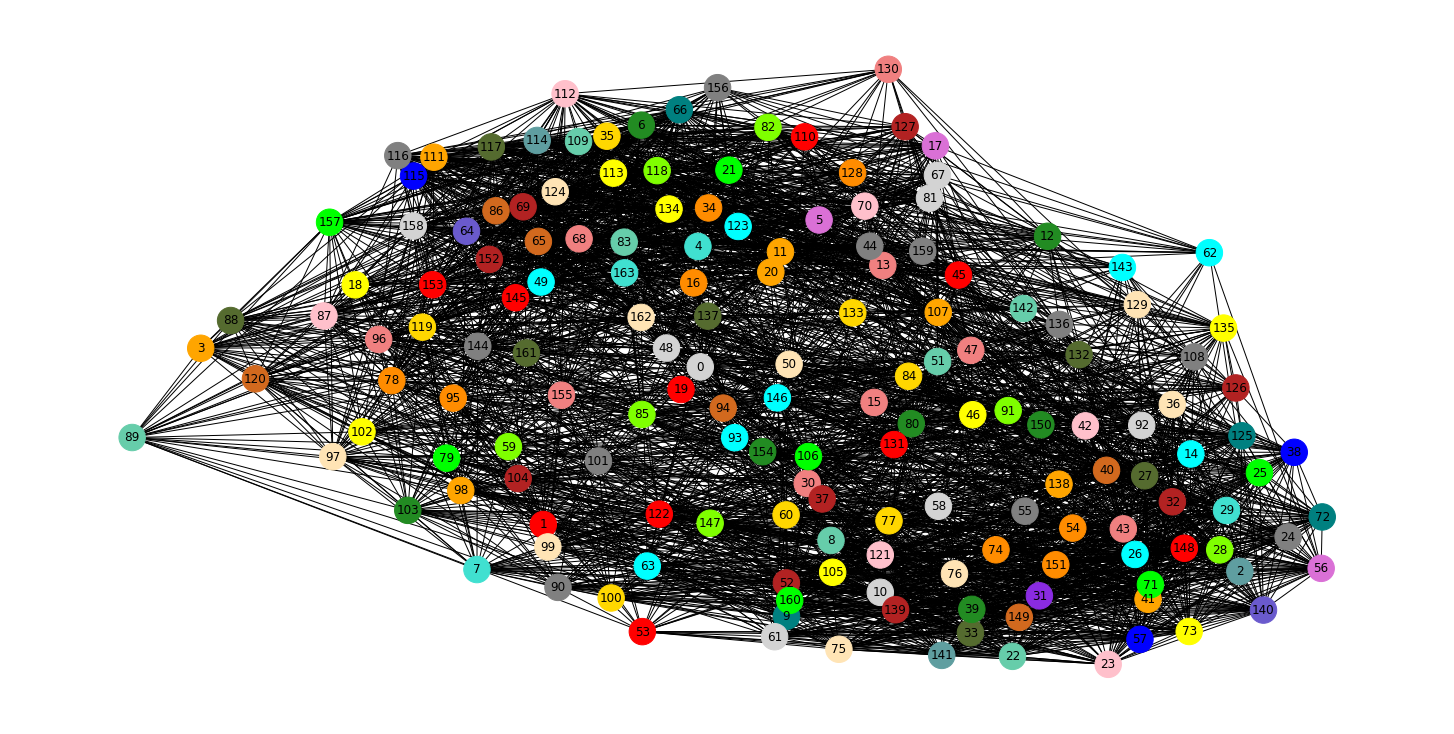

In [ ]:
d = nx.greedy_color(Gcb)
print(max(d.values()))
plt.figure(figsize=(20,10))
color_map = []
for node in Gcb:
    color_map.append(col[d[node]-1])
nx.draw(Gcb, node_color=color_map, with_labels=True, node_size=700)
plt.show()

27


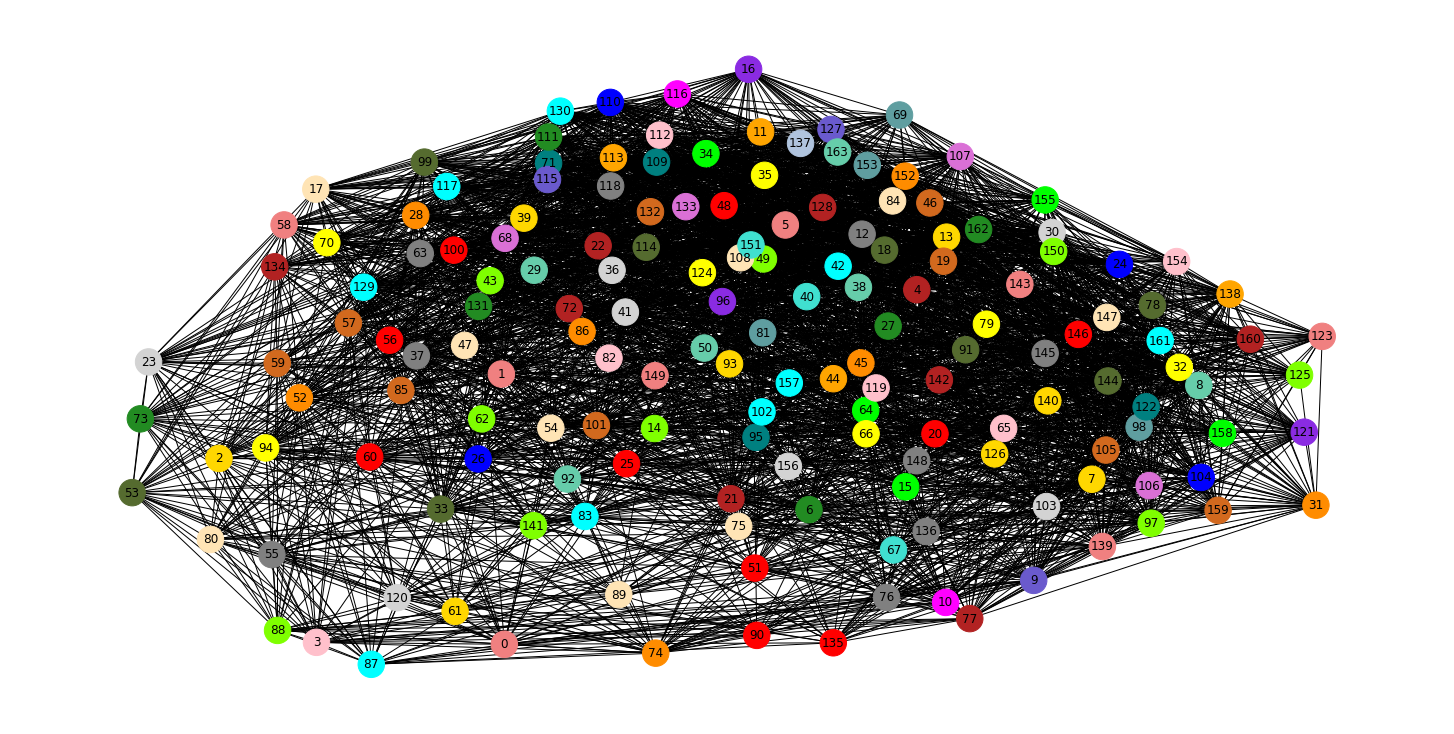

In [ ]:
d = nx.greedy_color(Gsb)
print(max(d.values()))
plt.figure(figsize=(20,10))
color_map = []
for node in Gsb:
    color_map.append(col[d[node]-1])
nx.draw(Gsb, node_color=color_map, with_labels=True, node_size=700)
plt.show()